<a href="https://colab.research.google.com/github/santiagorg2401/tensorflow_course_exercises/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification with TensorFlow
* Binary classification.
* Multiclass classification.
* Multilabel classification.

## Create synthetic data.

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples.
n_samples = 1000

# Create circles.
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

In [2]:
# Check out the features.
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels.
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Visualize data.

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


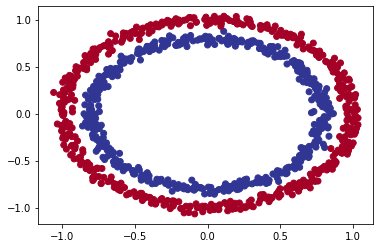

In [5]:
# Visualize with a plot.
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes.

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
# view the first sample.
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling.

In [9]:
import numpy as np

def plot_decision_boundary(model, X, y):
  ''' 
  Takes a trained model, features X and labels.
  Creates a meshgrid of X values.
  Makes predictions across meshgrid.
  Plots predictions and line zones.
  '''
  # Define axis boundaries.
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  # Create meshgrid.
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
  
  # Create X value.
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together.

  # Make predictions.
  y_pred = model.predict(x_in)

  # Check for multi-class.
  if len(y_pred[0]) > 1:
    print("Doing multi-class classification.")

    # Reshape.
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification.")
    y_pred = np.round(y_pred).reshape(xx.shape)


  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

### `model_0`

In [10]:
import tensorflow as tf

# Set random seed.
tf.random.set_seed(42)

# Build the model.
model_0 = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
])

# Compile the model.
model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model.
model_0.fit(X, y, epochs=5, verbose=0)

# Evaluate model.
model_0_loss, model_0_accuracy = model_0.evaluate(X, y)
print(model_0_loss, model_0_accuracy)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5090
0.6934751272201538 0.5090000033378601


313/313 [==============================] - 1s 2ms/step
Doing binary classification.


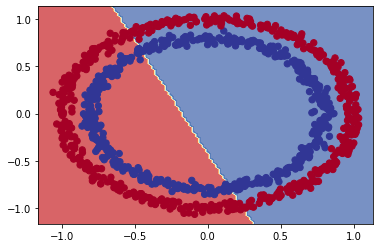

In [11]:
# Check predictions.
plot_decision_boundary(model_0, X, y)

### `model_1`

In [12]:
# Improve model.

# Set random seed.
tf.random.set_seed(42)

# Build the model.
model_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
])

# Compile the model.
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model.
model_1.fit(X, y, epochs=200, verbose=0)

# Evaluate model.
model_1_loss, model_1_accuracy = model_1.evaluate(X, y)
print(model_1_loss, model_1_accuracy)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000
0.6934831142425537 0.5


313/313 [==============================] - 0s 1ms/step
Doing binary classification.


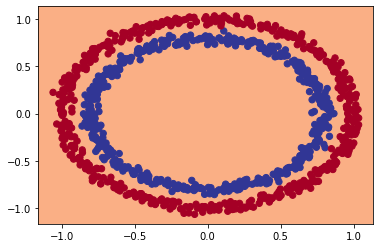

In [13]:
# Check predictions.
plot_decision_boundary(model_1, X, y)

### `model_2`

In [14]:
# Set random seed.
tf.random.set_seed(42)

# Build the model.
model_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(1),
          tf.keras.layers.Dense(1)
])

# Compile the model.
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model.
model_2.fit(X, y, epochs=100, verbose=0)

# Evaluate model.
model_2_loss, model_2_accuracy = model_2.evaluate(X, y)
print(model_2_loss, model_2_accuracy)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000
0.6933314204216003 0.5


313/313 [==============================] - 0s 1ms/step
Doing binary classification.


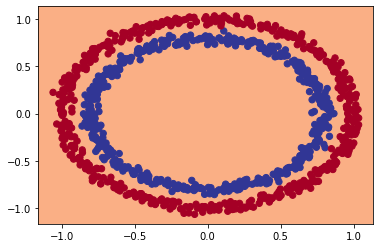

In [15]:
# Check predictions.
plot_decision_boundary(model_2, X, y)

### `model_3`

In [16]:
# Set random seed.
tf.random.set_seed(42)

# Build the model.
model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
])

# Compile the model.
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model.
model_3.fit(X, y, epochs=100, verbose=0)

# Evaluate model.
model_3_loss, model_3_accuracy = model_3.evaluate(X, y)
print(model_3_loss, model_3_accuracy)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080
0.6980254650115967 0.5080000162124634


313/313 [==============================] - 1s 2ms/step
Doing binary classification.


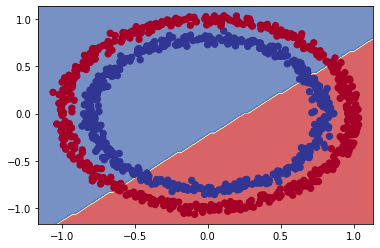

In [17]:
# Check predictions.
plot_decision_boundary(model_3, X, y)

### `model_4`

In [18]:
# Set random seed.
tf.random.set_seed(42)

# Build the model.
model_4 = tf.keras.Sequential([
          tf.keras.layers.Dense(2, activation='relu'),
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model.
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model.
model_4.fit(X, y, epochs=100, verbose=0)

# Evaluate model.
model_4_loss, model_4_accuracy = model_4.evaluate(X, y)
print(model_4_loss, model_4_accuracy)

32/32 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.7170
0.5473987460136414 0.7170000076293945


313/313 [==============================] - 0s 1ms/step
Doing binary classification.


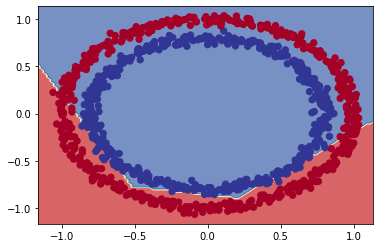

In [19]:
# Check predictions.
plot_decision_boundary(model_4, X, y)

### Could the linear ones work for linear regression? let's build `model_5`

In [20]:
# Set random seed
tf.random.set_seed(42)
 
# 1. Create the model (this time 3 layers)
model_5 = tf.keras.Sequential([
  ## Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons
 
  ## After TensorFlow 2.7.0
  tf.keras.layers.Dense(100, input_shape=(None, 1)), # <- define input_shape here
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])
 
# 2. Compile the model
model_5.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['mae'])

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)
 
# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]
 
# Fit our model to the data
 
## Note: Before TensorFlow 2.7.0, this line would work
# model_5.fit(X_reg_train, y_reg_train, epochs=100) # <- this will error in TensorFlow 2.7.0+
 
## After TensorFlow 2.7.0
model_5.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100, verbose=0)

# Evaluate.
model_5_loss, model_5_metrics = model_5.evaluate(tf.expand_dims(X_reg_test, axis=-1), y_reg_test)

2/2 [==============================] - 0s 5ms/step - loss: 135.0472 - mae: 135.0472


2/2 [==============================] - 0s 6ms/step


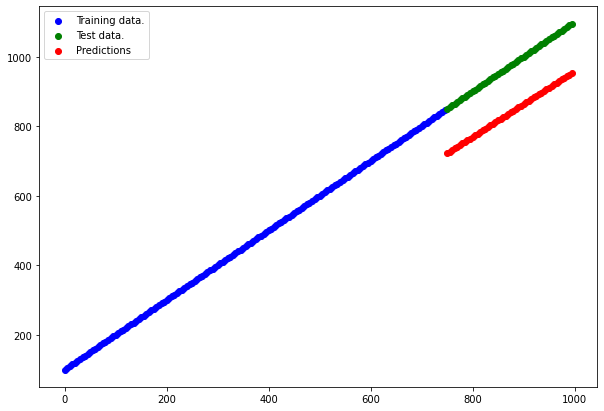

In [21]:
# Check predictions.
y_reg_preds = model_5.predict(tf.expand_dims(X_reg_test, axis=-1))

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data.')
plt.scatter(X_reg_test, y_reg_test, c = 'g', label='Test data.')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend()

## Non-linearity.

### `model_6`

In [22]:
# Set random seed.
tf.random.set_seed(42)

# Build model.
model_6  = tf.keras.Sequential([
           tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model.
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model.
history_6 = model_6.fit(X, y, epochs=200, verbose=0)

# Evaluate.
model_6_loss, model_6_metrics = model_6.evaluate(X, y)
print(model_6_loss, model_6_metrics)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 5ms/step - loss: 2.0561 - accuracy: 0.4570
2.0561225414276123 0.4569999873638153


313/313 [==============================] - 1s 3ms/step
Doing binary classification.


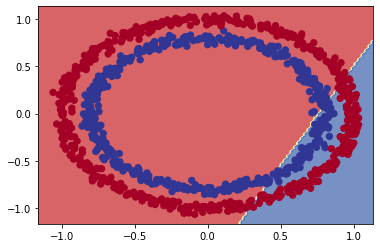

In [23]:
# Check predictions.
plot_decision_boundary(model_6, X, y)

### `model_7`

In [24]:
# Set random seed.
tf.random.set_seed(42)

# Build the model.
model_7 = tf.keras.Sequential([
          tf.keras.layers.Dense(1, activation='relu')
])

# Compile the model.
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model.
history_7 = model_7.fit(X, y, epochs=100, verbose=0)

# Evaluate the model.
model_7_loss, model_7_metrics = model_7.evaluate(X, y)
print(model_7_loss, model_7_metrics)

32/32 [==============================] - 0s 2ms/step - loss: 3.6831 - accuracy: 0.4210
3.683102607727051 0.42100000381469727


313/313 [==============================] - 1s 2ms/step
Doing binary classification.


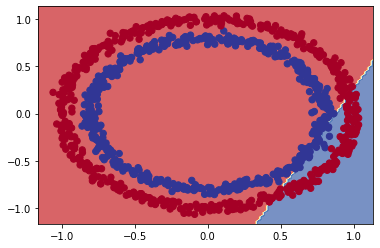

In [25]:
# Check predictions.
plot_decision_boundary(model_7, X, y)

###`model_8`

In [26]:
# Set random seed.
tf.random.set_seed(42)

# Build the model.
model_8 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation='relu'),
          tf.keras.layers.Dense(4, activation='relu'),
          tf.keras.layers.Dense(1)
])

# Compile the model.
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model.
history_8 = model_8.fit(X, y, epochs = 250, verbose=0)

# Evaluate the model.
model_8_loss, model_8_metrics = model_8.evaluate(X, y)
print(model_8_loss, model_8_metrics)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
7.712474346160889 0.5


313/313 [==============================] - 0s 1ms/step
Doing binary classification.


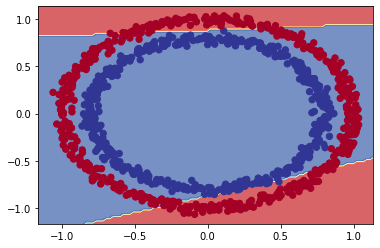

In [27]:
# Check predictions.
plot_decision_boundary(model_8, X, y)

###`model_9`

In [28]:
# Set random seed.
tf.random.set_seed(42)

# Build the model.
model_9 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation='relu'),
          tf.keras.layers.Dense(4, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model.
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model.
history_9 = model_9.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
model_9_loss, model_9_metrics = model_9.evaluate(X, y)
print(model_9_loss, model_9_metrics)

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910
0.29480040073394775 0.9909999966621399


313/313 [==============================] - 1s 2ms/step
Doing binary classification.


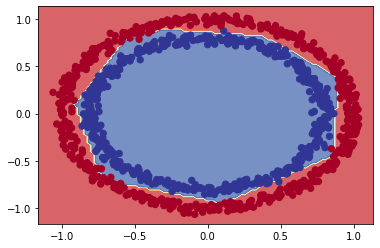

In [29]:
# Check predictions.
plot_decision_boundary(model_9, X, y)

###`model_10` 🚀

In [30]:
# Set random seed.
tf.random.set_seed(42)

# Build the model.
model_10 = tf.keras.Sequential([
          tf.keras.Input(shape=(None, 1, 2)),                     
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model.
model_10.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model.
history_10 = model_10.fit(X, y, epochs=500, verbose=0)

# Evaluate the model
model_10_loss, model_10_metrics = model_10.evaluate(X, y)
print(model_10_loss, model_10_metrics)

32/32 [==============================] - 0s 2ms/step - loss: 3.0063e-04 - accuracy: 1.0000
0.00030062696896493435 1.0


313/313 [==============================] - 1s 2ms/step
Doing binary classification.


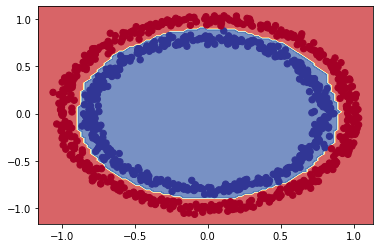

In [31]:
# Check predictions.
plot_decision_boundary(model_10, X, y)

## Comparing models.

In [32]:
model_results = [["model_0", model_0_accuracy],
                 ["model_1", model_1_accuracy],
                 ["model_2", model_2_accuracy],
                 ["model_3", model_3_accuracy],
                 ["model_4", model_4_accuracy],
                 ["model_6", model_6_metrics],
                 ["model_7", model_7_metrics],
                 ["model_8", model_8_metrics],
                 ["model_9", model_9_metrics],
                 ["model_10", model_10_metrics],]

import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "Accuracy %"])
all_results

,model,Accuracy %
0,model_0,0.509
1,model_1,0.500
2,model_2,0.500
3,model_3,0.508
4,model_4,0.717
5,model_6,0.457
6,model_7,0.421
7,model_8,0.500
8,model_9,0.991
9,model_10,1.000


## Create training and test sets.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Recreate `model_10` into `model_11`

In [34]:
# Set random seed.
tf.random.set_seed(42)

# Build the model.
model_11 = tf.keras.Sequential([
          tf.keras.Input(shape=(None, 1, 2)),                     
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model.
model_11.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model.
history_11 = model_11.fit(X_train, y_train, epochs=500, verbose=0)

# Evaluate the model
model_11_loss, model_11_metrics = model_11.evaluate(X_test, y_test)
print(model_11_loss, model_11_metrics)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
0.0026665597688406706 1.0


313/313 [==============================] - 0s 1ms/step
Doing binary classification.
313/313 [==============================] - 0s 1ms/step
Doing binary classification.


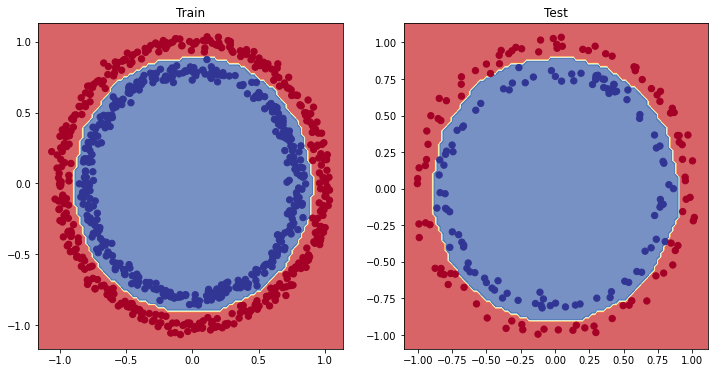

In [35]:
# Check predictions.
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_11, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_11, X=X_test, y=y_test)
plt.show()

## Plot loss curves.

In [36]:
# Convert history object into DataFrame
pd.DataFrame(history_11.history)

,loss,accuracy
0,0.697454,0.50000
1,0.685037,0.50375
2,0.679842,0.52875
3,0.677341,0.53250
4,0.674568,0.53000
...,...,...
495,0.000392,1.00000
496,0.000403,1.00000
497,0.000358,1.00000
498,0.000392,1.00000


Text(0.5, 1.0, 'Model 11 loss curves.')

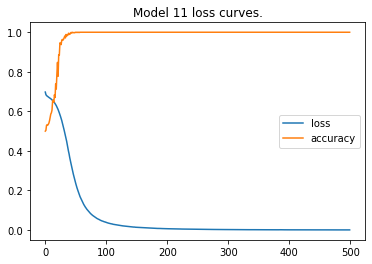

In [37]:
# Plot loss curves.
pd.DataFrame(history_11.history).plot()
plt.title("Model 11 loss curves.")

## Finding the best learning rate.
Learning rate where the loss decreases the most during training.
* A learning rate **callback**.
* More models.
* Plot a modified loss curve.

### `model_12`

In [38]:
# Set random seed.
tf.random.set_seed(42)

# Build the model.
model_12 = tf.keras.Sequential([
           tf.keras.layers.Dense(4, activation='relu'),
           tf.keras.layers.Dense(4, activation='relu'),
           tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model.
model_12.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create a learning rate callback.
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Train the model.
history_12 = model_12.fit(X_train, y_train, epochs=100, verbose=0, callbacks=[lr_scheduler])

# Evaluate the model.
model_12_loss, model_12_metrics = model_12.evaluate(X_test, y_test)
print(model_12_loss, model_12_metrics)

7/7 [==============================] - 0s 3ms/step - loss: 0.9619 - accuracy: 0.5000
0.9619014859199524 0.5


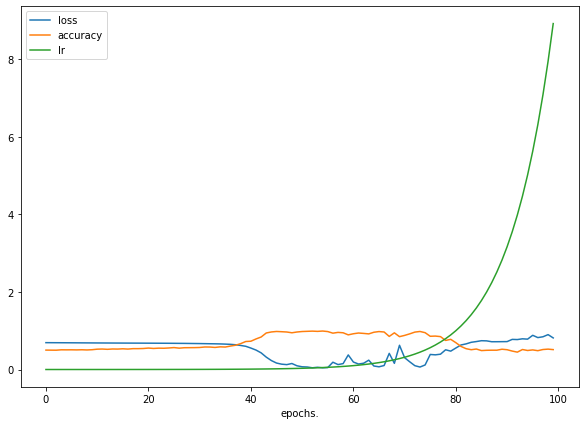

In [39]:
# Check the history.
pd.DataFrame(history_12.history).plot(figsize=(10,7), xlabel="epochs.")

The ideal learning rate should be approximately 10 times before the lowest point in the learning rate vs loss graph, however, the best learning rate is the one which decreases loss the fastest.

The ideal learning rate should be around: 0.004359505698084831


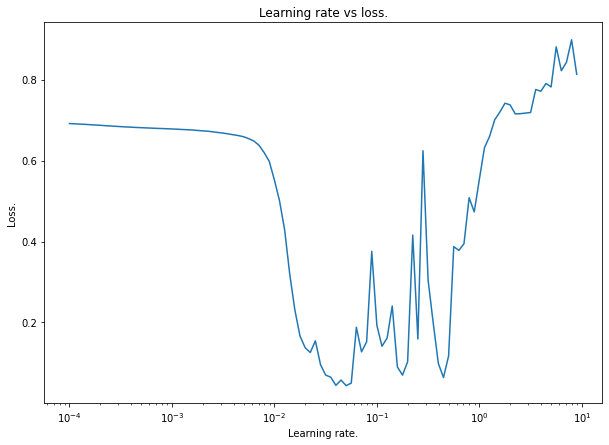

In [40]:
# Plot learning rate vs the loss.
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_12.history["loss"])
plt.xlabel("Learning rate.")
plt.ylabel("Loss.")
plt.title("Learning rate vs loss.")

print("The ideal learning rate should be around: " + str(min(history_12.history["loss"])/10))

313/313 [==============================] - 0s 1ms/step
Doing binary classification.
313/313 [==============================] - 0s 1ms/step
Doing binary classification.


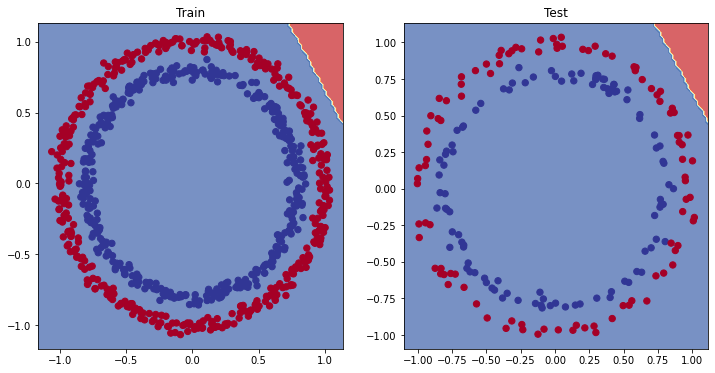

In [41]:
# Check predictions.
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_12, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_12, X=X_test, y=y_test)
plt.show()

###`model_13` with ideal learning rate gotten from `model_12`

In [42]:
# Set random seed.
tf.random.set_seed(42)

# Build the model.
model_13 = tf.keras.Sequential([
           tf.keras.layers.Dense(4, activation='relu'),
           tf.keras.layers.Dense(4, activation='relu'),
           tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model.
model_13.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=['accuracy'])


# Train the model.
history_13 = model_13.fit(X_train, y_train, epochs=20, verbose=0)

# Evaluate the model.
model_13_loss, model_13_metrics = model_13.evaluate(X_test, y_test)
print(model_13_loss, model_13_metrics)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9100
0.21504613757133484 0.9100000262260437


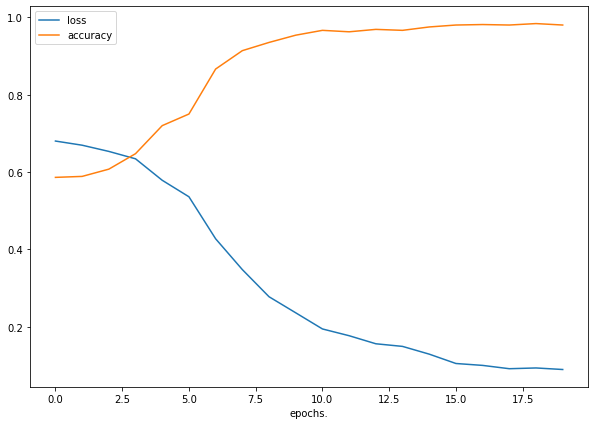

In [43]:
# Check the history.
pd.DataFrame(history_13.history).plot(figsize=(10,7), xlabel="epochs.")

313/313 [==============================] - 0s 1ms/step
Doing binary classification.
313/313 [==============================] - 0s 1ms/step
Doing binary classification.


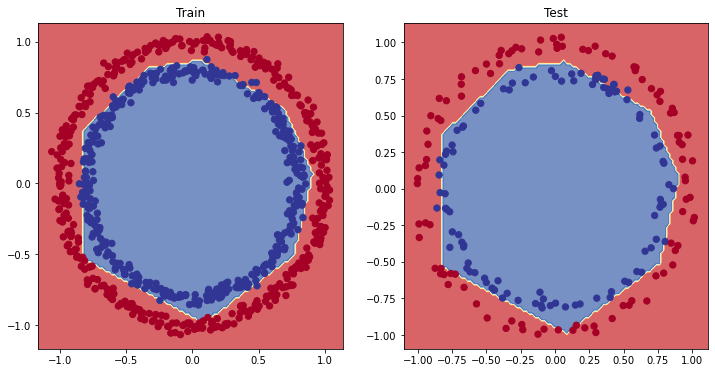

In [44]:
# Check predictions.
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_13, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_13, X=X_test, y=y_test)
plt.show()

## Evaluation methods.
* Accuracy.
* Precision.
* Recall.
* F1-score.
* Confusion matrix.
* Classification report (from sckit-learn)

In [45]:
# Check the accuracy of our model.
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}")

7/7 [==============================] - 0s 2ms/step - loss: 6.9852e-04 - accuracy: 1.0000
Model loss on the test set: 0.0006985158543102443
Model accuracy on the test set: 100.00


In [47]:
# Confusion matrix.
from sklearn.metrics import confusion_matrix

# Make predictions.
y_preds = model_10.predict(X_test)

# Create confusion matrix.
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [48]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [49]:
y_preds[:10]

array([[9.9999744e-01],
       [8.5612155e-05],
       [9.9999774e-01],
       [9.3201187e-08],
       [9.9943626e-01],
       [9.9926513e-01],
       [1.7993957e-06],
       [2.3715501e-09],
       [9.9999648e-01],
       [6.4118553e-06]], dtype=float32)

Predictions are in prediction probability form, which is Sigmoid standard output.

In [50]:
#   Convert prediction probability to binary format.
tf.round(y_preds)

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
 

In [51]:
# Create a confusion matrix.
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   0],
       [  0, 100]])

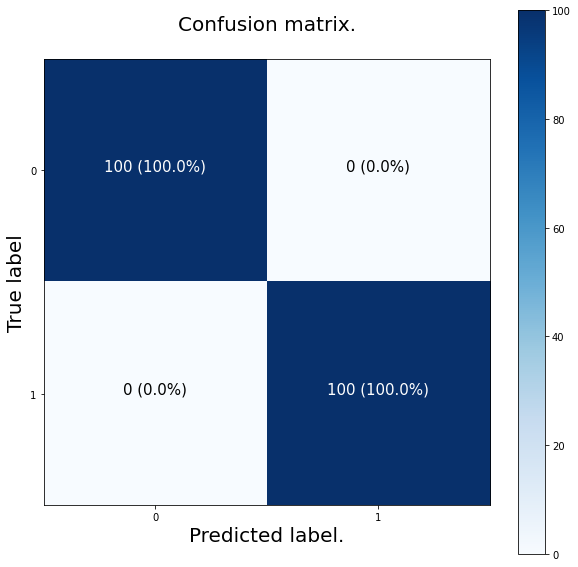

In [52]:
# Prettify the confusion matrix.
import itertools

figsize = (10, 10)

# Create the confusion matrix.
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize the confusion matrix.
n_classes = cm.shape[0]

# Let's prettify it.
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot.
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes.
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axis.
ax.set(title="Confusion matrix.",
       xlabel="Predicted label.",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom.
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size.
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors.
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell.
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Multiclass classification

In [53]:
# Gather the data.
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets.
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [54]:
# Show the first training example.
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [55]:
# Check the shape of a single example.
train_data[0].shape, train_labels[0].shape

((28, 28), ())

2

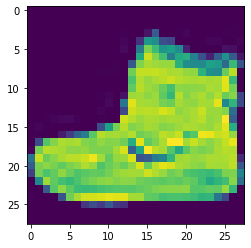

In [56]:
# Plot a single sample.
import matplotlib.pyplot as plt
plt.imshow(train_data[0])
train_labels[7]

In [57]:
# Create a human-readable list.
class_names =  ["T-shirt/top", "Trouser", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

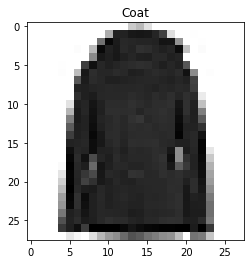

In [58]:
# Plot an example image and its label.
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

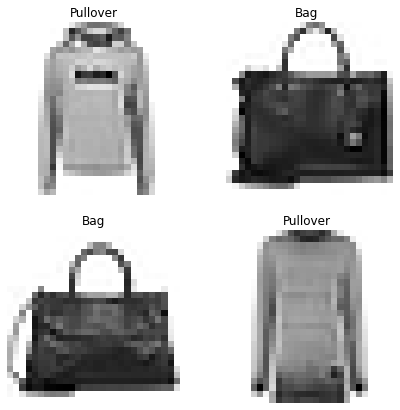

In [59]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [60]:
# Build a multi-class classification model.

# Check input shape.
print(train_data[0].shape)

# Check output shape.
print(len(class_names))

(28, 28)
10


In [61]:
# Set random seed.
tf.random.set_seed(42)

# Check the model.
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Data needs to be flattened from 28 x 28 to 784
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_hisotry = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accuracy:

In [62]:
# Normalize data to improve performance.
train_data_norm = train_data/255
test_data_norm = test_data/255

# Check normalization.
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [63]:
# Create model with normalized data.

# Set random seed.
tf.random.set_seed(42)

# Create a model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model.
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model.
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

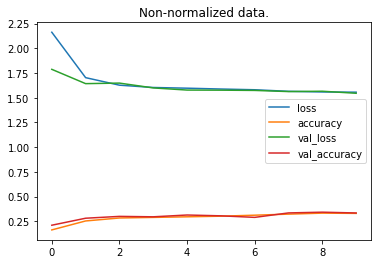

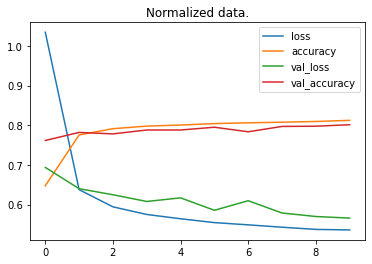

In [64]:
import pandas as pd
# Plot non-normalized data loss curves.
pd.DataFrame(non_norm_hisotry.history).plot(title="Non-normalized data.")
# Plot normalized data loss curves.
pd.DataFrame(norm_history.history).plot(title="Normalized data.")

## Finding the ideal learning rate.

In [65]:
# Set random seed.
tf.random.set_seed(42)

# Create model.
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model.
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback.
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model.
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate.')

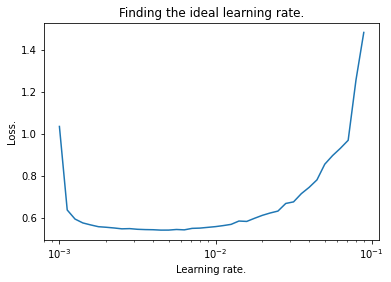

In [66]:
# Plot the learning rate decay curve.
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate.")
plt.ylabel("Loss.")
plt.title("Finding the ideal learning rate.")

The ideal learning rate seems to be around 1e-3, which is Adam's default.

In [67]:
# Refit a model with the ideal learning rate.

# Set random seed.
tf.random.set_seed(42)

# Build the model.
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model.
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                 metrics=["accuracy"])

# Fit the model.
history_14 = model_14.fit(train_data_norm,
                                train_labels,
                                epochs=40,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluate multi-class classfication model.

Evaluate performance.

### Confusion matrix.

In [68]:
# Prettify the confusion matrix.
import itertools
from sklearn.metrics import confusion_matrix

figsize = (10, 10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  # Create the confusion matrix.
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize the confusion matrix.
  n_classes = cm.shape[0]

  # Let's prettify it.
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot.
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes.
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axis.
  ax.set(title="Confusion matrix.",
        xlabel="Predicted label.",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom.
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size.
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors.
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [72]:
# Make predictions.
y_probs = model_14.predict(test_data_norm) # Probs is short for predictionm probabilities.

# View the first 5 predictions.
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.88361909e-10, 9.28191482e-11, 1.54092995e-05, 5.43358396e-07,
        1.89941511e-05, 2.89702743e-01, 4.39307009e-08, 4.38077077e-02,
        4.27454850e-03, 6.62180066e-01],
       [1.71894699e-05, 4.02383293e-16, 9.06400919e-01, 7.53999586e-07,
        2.47775782e-02, 3.30341691e-17, 6.83545396e-02, 0.00000000e+00,
        4.49071464e-04, 1.55225003e-15],
       [4.27191881e-05, 9.98511672e-01, 1.03824654e-07, 1.42299430e-03,
        1.52412949e-05, 6.00340264e-22, 7.24052961e-06, 1.13576411e-16,
        5.22827435e-08, 5.68489049e-12],
       [4.20100369e-05, 9.96582568e-01, 7.01886449e-07, 3.23580625e-03,
        1.18159100e-04, 1.90123935e-19, 2.00165869e-05, 4.74159015e-14,
        6.13936209e-07, 1.09671694e-09],
       [1.48454547e-01, 2.43307591e-06, 1.32626459e-01, 1.02307713e-02,
        3.30897234e-02, 4.14846215e-18, 6.75096035e-01, 2.76740124e-29,
        4.99934249e-04, 1.54012037e-14]], dtype=float32)

In [76]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.8836191e-10, 9.2819148e-11, 1.5409300e-05, 5.4335840e-07,
        1.8994151e-05, 2.8970274e-01, 4.3930701e-08, 4.3807708e-02,
        4.2745485e-03, 6.6218007e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [77]:
# Convert all of the prediction probabilities into integers.
y_preds = y_probs.argmax(axis=1)

# View the first prediction labels.
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [69]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [70]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[834,  13,  11,  53,   3,   2,  73,   0,  11,   0],
       [  6, 950,   1,  26,   5,   1,  11,   0,   0,   0],
       [ 42,   1, 593,   8, 164,   1, 178,   0,  13,   0],
       [ 74,  27,  10, 787,  35,   1,  56,   2,   8,   0],
       [  2,   1,  84,  29, 726,   0, 151,   0,   7,   0],
       [  0,   1,   0,   0,   0, 940,   0,  35,   3,  21],
       [217,   8, 118,  35,  98,   3, 505,   0,  16,   0],
       [  0,   0,   0,   0,   0,  70,   0, 903,   0,  27],
       [ 16,   1,  32,  19,   5,   9,   8,   5, 905,   0],
       [  0,   0,   0,   0,   1,  36,   0,  48,   5, 910]])

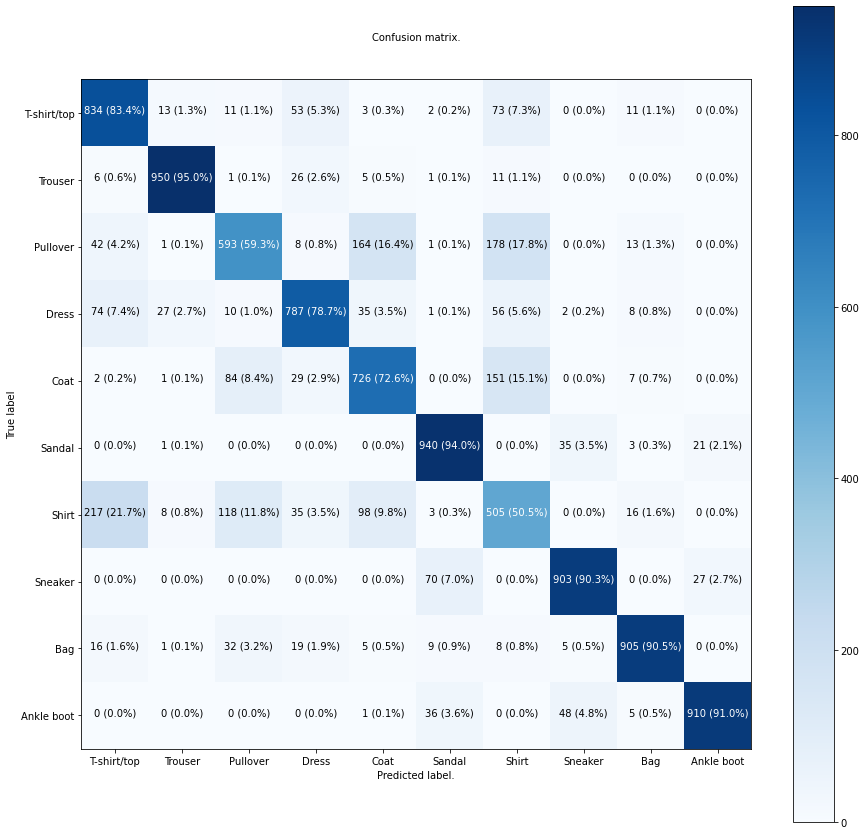

In [82]:
# Make a prettier confusion matrix.
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

### Plot random images with predictions.

In [84]:
import random
import matplotlib.pyplot as plt

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # Set up random integer.
  i = random.randint(0, len(images))

  # Create predictions and targets.
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depedning on if the prediction is right or wrong.
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (predictioon/true_label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color = color)

1/1 [==============================] - 0s 18ms/step


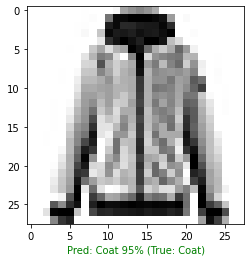

In [95]:
plot_random_image(model=model_14,
                  images=test_data_norm, # Always make prediction on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

# What patterns is our model learning.

In [96]:
# Find the layers of our most recent model.
model_14.layers

In [100]:
# Get the patterns of a later in our network.
weights, biases = model_14.layers[1].get_weights()

# Shapes.
weights, weights.shape

(array([[ 1.5932962 , -0.7686997 , -1.5784506 , -1.9988157 ],
        [ 0.4566792 , -1.295775  , -0.73220754, -0.16243073],
        [ 1.3499511 , -0.2002306 , -1.9897628 , -1.2142688 ],
        ...,
        [-0.21869269,  0.5934665 , -0.2728189 ,  0.46215102],
        [-0.2182535 ,  1.1962796 ,  0.54236287, -0.57917625],
        [ 0.3746476 , -0.19991685,  0.02721495,  0.24650985]],
       dtype=float32), (784, 4))

In [102]:
28*28

784

In [103]:
model_14.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 4)                 3140      
                                                                 
 dense_43 (Dense)            (None, 4)                 20        
                                                                 
 dense_44 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [106]:
# Bias and biases shapes.
biases, biases.shape

(array([ 0.33100232, -0.01015139, -0.15789638,  1.2011396 ], dtype=float32),
 (4,))

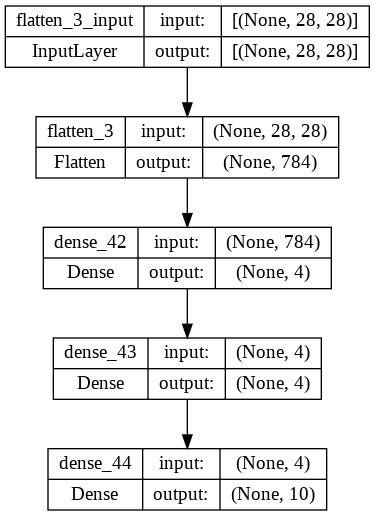

In [108]:
# Plot model.
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)